In [1]:
!pip install statsmodels

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Week3/SONY.csv')

In [5]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.3 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [7]:
# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data = time_series[:int(0.6*len(time_series))]
test_data = time_series[int(0.6*len(time_series)):]

In [8]:
from pmdarima.arima import auto_arima
import numpy as np
# Tìm kiếm các tham số tốt nhất bằng auto_arima
model_arima = auto_arima(np.array(train_data), start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=1, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=9.64 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3498.815, Time=0.25 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3281.319, Time=0.78 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3500.145, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3198.103, Time=0.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=14.80 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3196.159, Time=0.57 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3279.319, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3198.101, Time=0.70 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=4.49 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=3198.140, 

In [9]:
model_arima.fit(np.array(train_data))

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [10]:
# Dự đoán trên tập kiểm tra
predictions = model_arima.predict(n_periods=len(np.array(test_data)))

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(np.array(test_data), predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(np.array(test_data), predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(np.array(test_data), predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 131.85022050456453
Mean Squared Error (MSE): 22288.535515373558
Root Mean Squared Error (RMSE): 149.29345436211716
Mean Absolute Percentage Error (MAPE): 224.710732590919%


In [12]:
#Dự đoán 30 ngày
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = test_data.iloc[60].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model_arima.predict(n_periods=len(np.array(x_input)))
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model_arima.predict(n_periods=len(np.array(x_input)))
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

109.58699596556788
2
109.58699596556788
3
109.58699596556788
4
3 day input [109.58699597 109.58699597 109.58699597]
3 day output [109.58699597]
4 day input [109.58699597 109.58699597 109.58699597]
4 day output [109.58699597]
5 day input [109.58699597 109.58699597 109.58699597]
5 day output [109.58699597]
6 day input [109.58699597 109.58699597 109.58699597]
6 day output [109.58699597]
7 day input [109.58699597 109.58699597 109.58699597]
7 day output [109.58699597]
8 day input [109.58699597 109.58699597 109.58699597]
8 day output [109.58699597]
9 day input [109.58699597 109.58699597 109.58699597]
9 day output [109.58699597]
10 day input [109.58699597 109.58699597 109.58699597]
10 day output [109.58699597]
11 day input [109.58699597 109.58699597 109.58699597]
11 day output [109.58699597]
12 day input [109.58699597 109.58699597 109.58699597]
12 day output [109.58699597]
13 day input [109.58699597 109.58699597 109.58699597]
13 day output [109.58699597]
14 day input [109.58699597 109.5869959

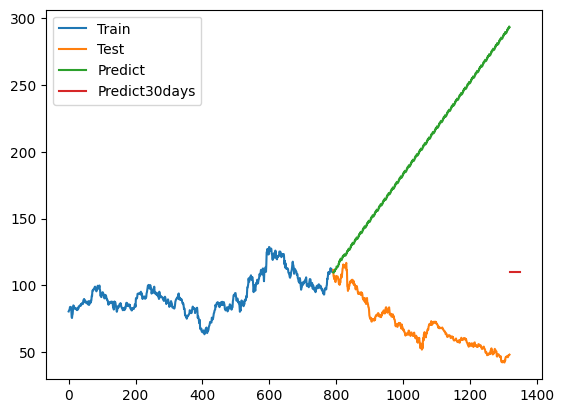

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_size = int(0.6 * len(time_series))
test_size = int(0.4 * len(time_series))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, train_data)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, test_data)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions), step=1)
plt.plot(test_data_index_pred, predictions)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(time_series), stop=len(time_series) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

In [14]:
#Dự đoán 60 ngày
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = test_data.iloc[60].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model_arima.predict(n_periods=len(np.array(x_input)))
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model_arima.predict(n_periods=len(np.array(x_input)))
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

109.58699596556788
2
109.58699596556788
3
109.58699596556788
4
3 day input [109.58699597 109.58699597 109.58699597]
3 day output [109.58699597]
4 day input [109.58699597 109.58699597 109.58699597]
4 day output [109.58699597]
5 day input [109.58699597 109.58699597 109.58699597]
5 day output [109.58699597]
6 day input [109.58699597 109.58699597 109.58699597]
6 day output [109.58699597]
7 day input [109.58699597 109.58699597 109.58699597]
7 day output [109.58699597]
8 day input [109.58699597 109.58699597 109.58699597]
8 day output [109.58699597]
9 day input [109.58699597 109.58699597 109.58699597]
9 day output [109.58699597]
10 day input [109.58699597 109.58699597 109.58699597]
10 day output [109.58699597]
11 day input [109.58699597 109.58699597 109.58699597]
11 day output [109.58699597]
12 day input [109.58699597 109.58699597 109.58699597]
12 day output [109.58699597]
13 day input [109.58699597 109.58699597 109.58699597]
13 day output [109.58699597]
14 day input [109.58699597 109.5869959

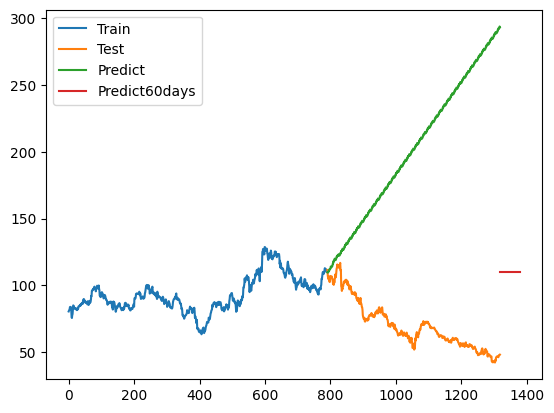

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_size = int(0.6 * len(time_series))
test_size = int(0.4 * len(time_series))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, train_data)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, test_data)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions), step=1)
plt.plot(test_data_index_pred, predictions)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(time_series), stop=len(time_series) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

In [16]:
#Dự doán 90 ngày
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = test_data.iloc[60].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model_arima.predict(n_periods=len(np.array(x_input)))
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model_arima.predict(n_periods=len(np.array(x_input)))
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

109.58699596556788
2
109.58699596556788
3
109.58699596556788
4
3 day input [109.58699597 109.58699597 109.58699597]
3 day output [109.58699597]
4 day input [109.58699597 109.58699597 109.58699597]
4 day output [109.58699597]
5 day input [109.58699597 109.58699597 109.58699597]
5 day output [109.58699597]
6 day input [109.58699597 109.58699597 109.58699597]
6 day output [109.58699597]
7 day input [109.58699597 109.58699597 109.58699597]
7 day output [109.58699597]
8 day input [109.58699597 109.58699597 109.58699597]
8 day output [109.58699597]
9 day input [109.58699597 109.58699597 109.58699597]
9 day output [109.58699597]
10 day input [109.58699597 109.58699597 109.58699597]
10 day output [109.58699597]
11 day input [109.58699597 109.58699597 109.58699597]
11 day output [109.58699597]
12 day input [109.58699597 109.58699597 109.58699597]
12 day output [109.58699597]
13 day input [109.58699597 109.58699597 109.58699597]
13 day output [109.58699597]
14 day input [109.58699597 109.5869959

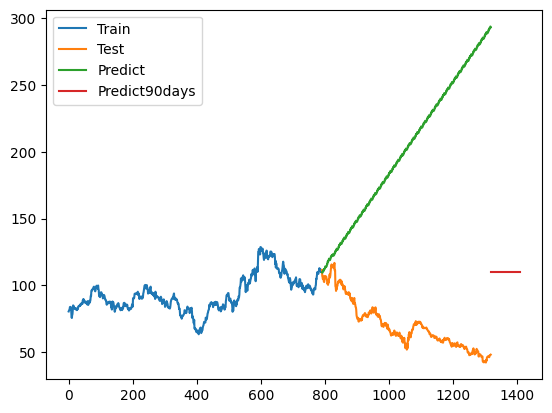

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_size = int(0.6 * len(time_series))
test_size = int(0.4 * len(time_series))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, train_data)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, test_data)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions), step=1)
plt.plot(test_data_index_pred, predictions)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(time_series), stop=len(time_series) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()